In [1]:
import tensorflow as tf
import numpy as np
np.random.seed(1234)
tf.random.set_seed(1234)
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt
from tensorflow import keras

import csv

2024-04-08 18:55:46.431210: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 18:55:46.431371: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 18:55:46.433749: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 18:55:46.465837: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 18:55:47.041904: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Definimos el random seed ara tener datos reproducibles

In [2]:

keras.utils.set_random_seed(1234)

Cargamso el dataset:

In [3]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Creamos el dataset en pandas y lo sufleamos

In [4]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                        columns= iris['feature_names'] + ['target'])
print("Numero de elementos de cada clase")
print(iris_df['target'].value_counts())
iris_df

Numero de elementos de cada clase
target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [5]:
def normalize_l2(df, columns):
  """
  Normalizes specified columns in a dataframe using L2 norm.

  Args:
      df: The pandas dataframe.
      columns: List of column names to normalize.

  Returns:
      A new dataframe with normalized columns.
  """
  df_norm = df.copy()
  for col in columns:
    # Calculate L2 norm for each row
    norm = df[col].apply(lambda x: np.sqrt(sum(x**2 for x in df[col])))

    # Avoid division by zero (rows with all zeros)
    norm[norm == 0] = 1

    # Normalize the column values
    df_norm[col] = df[col] / norm
  return df_norm

In [6]:
iris_shuffleados = iris_df.sample(frac=1, random_state=0)

tamañoIris = len(iris_shuffleados)
tamañoResto = int(tamañoIris * 0.8)


iris_trainAll = iris_shuffleados.iloc[:tamañoResto]
iris_pruebaAll = iris_shuffleados.iloc[tamañoResto:]


tamañoEntrenamiento = int(tamañoResto * 0.8)

irisEntrenamientoAll = iris_trainAll.iloc[:tamañoEntrenamiento]
irisValidacionAll = iris_trainAll.iloc[tamañoEntrenamiento:]

print(len(iris_trainAll), len(iris_pruebaAll))
print(len(irisEntrenamientoAll), len(irisValidacionAll))

120 30
96 24


In [7]:
irisEntrenamientoAll = irisEntrenamientoAll.to_numpy()
x = irisEntrenamientoAll[:, :-1]
y = irisEntrenamientoAll[:, -1]

irisValidacionAll = irisValidacionAll.to_numpy()
x_val = irisValidacionAll[:, :-1]
y_val = irisValidacionAll[:, -1]


iris_pruebaAll = iris_pruebaAll.to_numpy()
x_test = iris_pruebaAll[:, :-1]
y_test = iris_pruebaAll[:, -1]

In [8]:
y

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0., 2., 1., 0., 2.,
       2., 1., 0., 1., 1., 1., 2., 0., 2., 0., 0., 1., 2., 2., 2., 2., 1.,
       2., 1., 1., 2., 2., 2., 2., 1., 2., 1., 0., 2., 1., 1., 1., 1., 2.,
       0., 0., 2., 1., 0., 0., 1., 0., 2., 1., 0., 1., 2., 1., 0., 2., 2.,
       2., 2., 0., 0., 2., 2., 0., 2., 0., 2., 2.])

In [9]:

my_callbacks = [
    keras.callbacks.EarlyStopping(patience=2),
    keras.callbacks.ModelCheckpoint(filepath='modelo.{epoch:02d}-{val_loss:.2f}.keras'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

neuronas = [12, 24, 36, 48]
learning_rates = [0.01, 0.05, 0.1]
momentums = [0.1, 0.25, 0.5]
capas = [5, 7, 10]

epochs = [300]

for neurona in neuronas:
    for i in capas:
       for lr in learning_rates:
            for epoch in epochs:
                for momentum in momentums:
                    modelo = keras.Sequential()
                    modelo.add(keras.layers.Dense(units=16, activation="relu", input_shape=(4,)))
                    for j in range(i):
                        modelo.add(keras.layers.Dense(neurona, activation="relu"))
                        if j == i-1:
                            print("-" * 100 + "\n")
                            print("modelo con " + str(neurona) +" neuronas por capa, " + str(i) +" capas")
                            modelo.add(keras.layers.Dense(3, activation="sigmoid"))
                            
                            nombre = 'str(neurona) neuronas  + i +  capas'
                            modelo.name = str(neurona)
                            
                            optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=momentum)
                            modelo.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
                            modelo.fit(x=x, y=y, epochs=epoch, batch_size=32, verbose=0)
                            
                            loss, accuracy = modelo.evaluate(x, y)
                            lossVal, accuracyVal = modelo.evaluate(x_val, y_val)
                            lossTest, accuracyTest = modelo.evaluate(x_test, y_test)

                            print("Hiperparametros:\n")
                            print("Capas:", i)
                            print("Neuronas por capa:", neurona)
                            print("Learning Rate:", lr)
                            print("Epochs:", epoch)
                            print("Momentum:", momentum)
                            print("Train Loss:", loss)
                            print("Train Accuracy:", accuracy)
                            print("Validation Loss:", lossVal)
                            print("Validation Accuracy:", accuracyVal)
                            print("Test Loss:", lossTest)
                            print("Test Accuracy:", accuracyTest)
                            with open("dataFinal.csv", "a", newline="") as csvfile:
                                writer = csv.writer(csvfile)
                                #writer.writerow(["Capas", "Neuronas por capa", "loss", "accuracy"])
                                writer.writerow([i, neurona, lr, epoch, momentum ,lossVal, loss, accuracy ,accuracyVal, lossTest, accuracyTest])




----------------------------------------------------------------------------------------------------

modelo con 12 neuronas por capa, 5 capas


/home/david/Trabajos/IA2/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9414 - loss: 0.1016 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8750 - loss: 0.2271
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0257
Hiperparametros:

Capas: 5
Neuronas por capa: 12
Learning Rate: 0.01
Epochs: 300
Momentum: 0.1
Train Loss: 0.11263579875230789
Train Accuracy: 0.9375
Validation Loss: 0.22713632881641388
Validation Accuracy: 0.875
Test Loss: 0.02574663609266281
Test Accuracy: 1.0
----------------------------------------------------------------------------------------------------

modelo con 12 neuronas por capa, 5 capas
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9362 - loss: 0.1252 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.8750 - loss: 0.2984
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0301
Hiperparametros:

Capas: 5
Neuronas por capa: 12
Learning Rate: 0.01
Epochs: 300
Momentum: 0.25
Train Loss: 0.13866345584392548
Train Accuracy: 0.927083313465118

In [23]:
import pandas as pd


def weighted_score(row):
    loss_weight = 0.7  # Adjust weights based on your problem's priorities
    accuracy_weight = 1 - loss_weight
    return (loss_weight * (1 - row["Test loss"])) + (accuracy_weight * row["Test accuracy"])


# Add a column for the weighted score
data = pd.read_csv("dataFinal.csv")
data
data["weighted_score"] = data.apply(weighted_score, axis=1)

# Identify the rows with the highest weighted score
n_best = 3  # Change this to the number of best results you want to see
top_models = data.nlargest(n_best, "weighted_score")

print("Best Hyperparameters:")
for i in range(len(top_models)):
    # Print the best hyperparameters and corresponding metrics
    print(f"Model {i+1}")
    print("Capas:", top_models.iloc[i]["Capas ocultas"])
    print("Neuronas por capa:", top_models.iloc[i]["Neuronas por capa"])
    print("Learning rate:", top_models.iloc[i]["Learning rate"])
    print("Epochs:", top_models.iloc[i]["Epochs"])
    print("Momentum:", top_models.iloc[i]["Momentum"])
    print("Validation loss:", top_models.iloc[i]["Validation loss"])
    print("Validation accuracy:", top_models.iloc[i]["Validation accuracy"])
    print("Test loss:", top_models.iloc[i]["Test loss"])
    print("Test accuracy:", top_models.iloc[i]["Test accuracy"])
    print("-" * 30)

momentumFinal = top_models.iloc[0]["Momentum"]
learningRateFinal = top_models.iloc[0]["Learning rate"]
neuronasPorCapaFinal = int(top_models.iloc[0]["Neuronas por capa"])
numCapasFinal = int(top_models.iloc[0]["Capas ocultas"])




Best Hyperparameters:
Model 1
Capas: 10.0
Neuronas por capa: 48.0
Learning rate: 0.05
Epochs: 300.0
Momentum: 0.1
Validation loss: 0.1138523444533348
Validation accuracy: 0.9166666865348816
Test loss: 0.0171360690146684
Test accuracy: 1.0
------------------------------
Model 2
Capas: 7.0
Neuronas por capa: 48.0
Learning rate: 0.05
Epochs: 300.0
Momentum: 0.25
Validation loss: 0.0835584625601768
Validation accuracy: 0.9166666865348816
Test loss: 0.0187960434705019
Test accuracy: 1.0
------------------------------
Model 3
Capas: 7.0
Neuronas por capa: 36.0
Learning rate: 0.05
Epochs: 300.0
Momentum: 0.25
Validation loss: 0.1535277217626571
Validation accuracy: 0.875
Test loss: 0.0193348340690135
Test accuracy: 1.0
------------------------------


In [25]:
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units=16, activation="relu", input_shape=(4,)))
for j in range(int(numCapasFinal)):
    modelo.add(keras.layers.Dense(neuronasPorCapaFinal, activation="relu"))
    if j == numCapasFinal-1:
        modelo.add(keras.layers.Dense(3, activation="sigmoid"))


optimizer = keras.optimizers.SGD(learning_rate=learningRateFinal, momentum=momentumFinal)
modelo.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
modelo.fit(x=x, y=y, epochs=400, batch_size=32, validation_data=(x_val, y_val), verbose=0)
lossVal, accuracyVal = modelo.evaluate(x_val, y_val)
lossTest, accuracyTest = modelo.evaluate(x_test, y_test)

print("Validation Loss:", lossVal)
print("Validation Accuracy:", accuracyVal)

print("Test Loss:", lossTest)
print("Test Accuracy:", accuracyTest)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0588
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0361
Validation Loss: 0.05876501277089119
Validation Accuracy: 1.0
Test Loss: 0.03608905151486397
Test Accuracy: 1.0


In [26]:
print("Validation Loss:", lossVal)
print("Validation Accuracy:", accuracyVal)
print("\n")
print("Test Loss:", lossTest)
print("Test Accuracy:", accuracyTest)

Validation Loss: 0.05876501277089119
Validation Accuracy: 1.0


Test Loss: 0.03608905151486397
Test Accuracy: 1.0


In [27]:
data

,Capas ocultas,Neuronas por capa,Learning rate,Epochs,Momentum,Validation loss,Entrenamieto loss,Entrenamieto accuracy,Validation accuracy,Test loss,Test accuracy,weighted_score
0,5,12,0.01,300,0.10,0.227136,0.112636,0.937500,0.875000,0.025747,1.000000,0.981977
1,5,12,0.01,300,0.25,0.298363,0.138663,0.927083,0.875000,0.030063,1.000000,0.978956
2,5,12,0.01,300,0.50,0.109033,0.088999,0.947917,0.916667,0.029412,1.000000,0.979412
3,5,12,0.05,300,0.10,0.150508,0.099010,0.947917,0.875000,0.026992,1.000000,0.981106
4,5,12,0.05,300,0.25,0.056307,0.060473,0.979167,1.000000,0.042610,1.000000,0.970173
...,...,...,...,...,...,...,...,...,...,...,...,...
103,10,48,0.05,300,0.25,0.201083,0.161568,0.927083,0.875000,0.035488,1.000000,0.975158
104,10,48,0.05,300,0.50,0.037221,0.055624,0.979167,1.000000,0.049992,0.966667,0.955005
105,10,48,0.10,300,0.10,0.253705,0.368434,0.947917,0.958333,0.320700,1.000000,0.775510
106,10,48,0.10,300,0.25,0.277673,0.410289,0.760417,0.875000,0.309555,0.833333,0.733312


In [31]:
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(units=16, activation="relu", input_shape=(4,)))
for j in range(int(numCapasFinal)):
    modelo.add(keras.layers.Dense(neuronasPorCapaFinal, activation="relu"))
    if j == numCapasFinal-1:
        modelo.add(keras.layers.Dense(3, activation="sigmoid"))


optimizer = keras.optimizers.SGD(learning_rate=learningRateFinal, momentum=momentumFinal)
modelo.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = modelo.fit(x=x, y=y, epochs=400, batch_size=32, validation_data=(x_val, y_val), verbose=0)
lossVal, accuracyVal = modelo.evaluate(x_val, y_val)
lossTest, accuracyTest = modelo.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9583 - loss: 0.0804
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0350


In [32]:
results_df = pd.DataFrame.from_dict(history.history)


<Axes: >

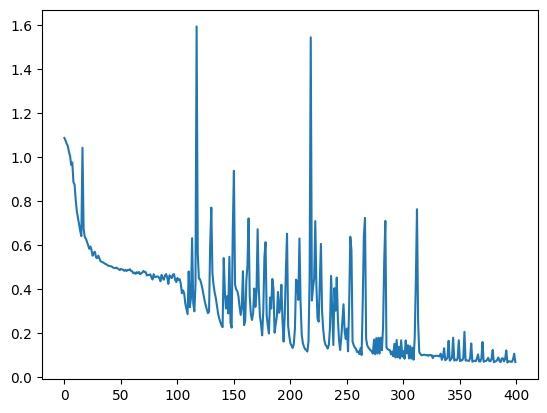

In [33]:
results_df['loss'].plot()